# Prediction of the Different Progressive Levels of Alzheimer's Disease

This project was carried out within the scope of UpSchool.

**Team members:**
- Eda AYDIN
- Büşra SABAK
- Dilara Esra ÇEBİN

## Table of Contents
- [Business Understanding](#business-understanding)
- [Data Understanding](#data-understanding)
- [Import Libraries](#import-libraries)
- [Exploratory Data Analaysis](#exploratory-data-analysis)
- [Feature Engineering & Data Preprocessing](##feature-engineering--data-preprocessing)
- [Feature Extraction](#feature-extraction)
- [Modeling](#modeling)
- [Resources](#resources)

## Business Understanding  - Project Objective

This is an optional model development project on a real dataset related to predicting the different progressive levels of Alzheimer's disease (AD). The students are expected to use tensorflow library for modeling process and will be asked to submit the predicted labels for a test dataset by which their score will be evaluated objectively. 

In this project, you are supposed to provide a data science model to determine the level of Alzheimer disease. The levels are the ordinal categories from lower to higher respectively: 0, 0.25, 0.50, 1.0, 2.0, 3.0 (that are the progressive levels of Alzheimer's disease) 

You are expected to use the following features:

['EDUC','NACCMOCA','MARISTAT','NACCFAM','NACCGDS','NACCNE4S','NACCAPOE', 'INDEPEND','RESIDENC','ANYMEDS','NACCAMD','DEL','HALL','DEPD','ANX','APA','DISN', 'IRR','MOT','AGIT','ELAT','NITE','APP','DROPACT','NACCAGEB','SEX']

## Data Understanding

| Form                                                | Variable Name | Short Descriptor                                                  | Variable Type         | Source |
|-----------------------------------------------------|---------------|-------------------------------------------------------------------|-----------------------|--------|
| A1 Subject Demographics                             | EDUC          | Years of education                                                | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | MARISTAT*     | Marital Status                                                    | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | INDEPEND*     | Level of Independence                                             | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | RESIDENC*     | Type of Residence                                                 | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | NACCAGEB      | Subject's age at initial visit                                    | NACC derived variable | v1-3   |
| A1 Subject Demographics                             | SEX           | Subject's sex                                                     | Original UDS Question | v1-3   |
| A3 Subject Family History                           | NACCFAM       | Indicator of first-degree family member with cognitive impairment | NACC derived variable | v1-3   |
| A4 Subject Medications                              | ANYMEDS       | Subject taking any medications                                    | Original UDS Question | v1-3   |
| A4 Subject Medications                              | NACCAMD       | Total number of medications reported at each visit                | NACC derived variable | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DEL           | Delusions in the last month                                       | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | HALL          | Hallucinations in the last month                                  | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DEPD          | Depression or dysphoria in the last month                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | ANX           | Anxiety in the last month                                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | APA           | Apathy or indifference in the last month                          | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DISN          | Disinhibition in the last month                                   | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | IRR           | Irritability or lability in the last month                        | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | MOT           | Motor disturbance in the last month                               | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | AGIT          | Agitation or aggression in the last month                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | ELAT          | Elation or euphoria in the last month                             | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | NITE          | Nighttime behaviors in the last month                             | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | APP           | Appetite and eating problems in the last month                    | Original UDS Question | v1-3   |
| B6 Geriatric Depression Scale (GDS)                 | NACCGDS       | Total GDS Score                                                   | NACC derived variable | v1-3   |
| B6 Geriatric Depression Scale (GDS)                 | DROPACT       | Have you dropped many of your activities and interests?           | Original UDS Question | v1-3   |
| C2 Neuropsychological Battery Scores                | NACCMOCA      | MoCA Total Score - corrected for education                        | NACC derived variable | v3     |

*: We don't have this data.


Target : CDRGLOB  --> Global CDR 
- 0.0 = No impairment
- 0.25 = Questionable impairment
- 0.5 = Mild impairment
- 1 (2 & 3) = Moderate - Severe impairment 

Your train dataset size should be 70%, validation dataset size 15% as well as the test size 15%. Your target metric will be F1 score. 



For EDUC :
- 0 - 36 
  - 12 : High School
  - 16 : Bachelors degree
  - 18 : Master's Degree
  - 20 : Doctorate

For SEX: (Convert this ):
- 1 : Male 
- 2 = Female

For NACCAGEB:
- 18 - 120 age

For NACCFAM:
- 0 = No report of a first-degree family member with cognitive impairment
- 1 = Report of at least one first-degree family member with cognitive impairment
- 9 = Unknown
- -4 = Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question

For ANYMEDS:
- 0 : No
- 1 : Yes
- -4 : Did not complete medications from (NaN olarak sayabilirsin)

For NACCAMD:
- 0 - 40 
- -4 : Did not complete medications form (NaN olarak sayabilirsin.)

For DEL /HALL / AGIT / DEPD / ANX / ELAT / APA / DISN / IRR / MOT / NITE / APP:
- 0 : No
- 1 : Yes 
- 9 : Unknown
- -4 : Not available. 

For DROPACT:
- 0 : No
- 1 : Yes 
- 9 : Did not answer 
- -4 : Not available

For NACCGDS:
- 0 - 15
- 88 : Could not be calculated
- - 4 : Not available. 

For NACCMOCA:
- 0 - 30 
- 88 = Item(s) or whole test not administered 
- 99 = Years of education missing/unknown 
- -4 = Not available:

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler, LabelEncoder,Normalizer

In [3]:
%pip install fast_ml --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
from fast_ml.model_development import train_valid_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

In [5]:
# If you want to run this code VSCode or PyCharm, use this code segment.
# TensorFlow GPU won't support for versions of 12.0 and higher. 
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Exploratory Data Analysis

In [7]:
def check_df(dataframe, head=5):
  """
  It gives summary of dataframe.
  """
  print("##################### Shape #####################")
  print(dataframe.shape)
  print("\n")
  print("##################### Types #####################")
  print(dataframe.dtypes)
  print("\n")
  print("##################### Head #####################")
  print(dataframe.head(head))
  print("\n")
  print("##################### Tail #####################")
  print(dataframe.tail(head))
  print("\n")
  print("##################### NA #####################")
  print(dataframe.isnull().sum())
  print("\n")
  print("##################### Quantiles #####################")
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    """
    It gives summary of categorical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot and save the figure of the specified column. Defaults to False.
    """
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("########################################## \n")

    if plot:
        ax = sns.countplot(x=dataframe[col_name], data=dataframe,
                           order = df[col_name].value_counts().index)
        
        ncount = len(dataframe)
        sns.set(font_scale = 1)
        
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text
    
        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
        plt.xticks(rotation=45)
        plt.title("{} Count Graph.png".format(col_name.capitalize()))
        plt.savefig("{} Count Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

In [9]:
def num_summary(dataframe, col_name, plot=False):
    """
    It gives the summary of numerical columns with a plot.
    
    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot and save the figure of the specified column. Defaults to False.

    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        dataframe[col_name].hist()
        plt.xlabel(col_name)
        plt.title("{} Histogram Graph.png".format(col_name.capitalize()))
        plt.savefig("{} Histogram Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

In [10]:
def target_summary_with_categorical_data(dataframe, target, categorical_col):
    """
    It gives the summary of specified categorical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved. 
        categorical_col (string): The categorical column names are to be retrieved.
    """
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [11]:
def target_summary_with_numerical_data(dataframe, target, numerical_col):
    """
    It gives the summary of specified numerical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved. 
        categorical_col (string): The numerical column names are to be retrieved.
    """
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [12]:
def correlation_matrix(df, cols):
    """
    It gives the correlation of numerical variables with each other.

    Args:
        df (dataframe): The dataframe from which variables names are to be retrieved.
        cols (list): The column name list are to be retrieved.
    """
    fig = plt.gcf()
    fig.set_size_inches(10,8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize = 10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5,
                      annot_kws={"size":12},linecolor="w",
                      cmap="RdBu")
    plt.savefig("Correlation Matrix.png")
    plt.show(block=True)


In [13]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/edaaydinea/UpSchool-Google-Developers-Machine-Learning-Program/main/Projects/01%20-%20Prediction%20of%20the%20Different%20Progressive%20Levels%20of%20Alzheimer's%20Disease/data.csv")
df = data[['EDUC','NACCMOCA','NACCFAM','NACCGDS','NACCNE4S','NACCAPOE',
           'ANYMEDS','NACCAMD','DEL','HALL','DEPD','ANX','APA','DISN', 
           'IRR','MOT','AGIT','ELAT','NITE','APP','DROPACT','NACCAGEB',
           'SEX','CDRGLOB']]

In [15]:
check_df(df)

##################### Shape #####################
(9180, 24)


##################### Types #####################
EDUC          int64
NACCMOCA      int64
NACCFAM       int64
NACCGDS       int64
NACCNE4S      int64
NACCAPOE      int64
ANYMEDS       int64
NACCAMD       int64
DEL           int64
HALL          int64
DEPD          int64
ANX           int64
APA           int64
DISN          int64
IRR           int64
MOT           int64
AGIT          int64
ELAT          int64
NITE          int64
APP           int64
DROPACT       int64
NACCAGEB      int64
SEX           int64
CDRGLOB     float64
dtype: object


##################### Head #####################
   EDUC  NACCMOCA  NACCFAM  NACCGDS  NACCNE4S  NACCAPOE  ANYMEDS  NACCAMD  \
0    13        21        0        0         0         1        1        5   
1    16        25        1        4         0         3        1        2   
2    10        13        0        8         0         3        1        7   
3    20        29        1        

### Parsing variable types

In [16]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df, categorical_threshold=5, cardinal_threshold=20)

Observations: 9180
Variables: 24
categorical_cols: 18
numerical_cols: 6
cardinal_cols: 0
nominal_cols: 18


In [17]:
print("Categorical column names: {}".format(categorical_cols))
print("Numerical column names: {}".format(numerical_cols))
print("Cardinal column names: {}".format(cardinal_cols))
print("Nominal column names: {}".format(nominal_cols))

Categorical column names: ['NACCFAM', 'NACCNE4S', 'ANYMEDS', 'DEL', 'HALL', 'DEPD', 'ANX', 'APA', 'DISN', 'IRR', 'MOT', 'AGIT', 'ELAT', 'NITE', 'APP', 'DROPACT', 'SEX', 'CDRGLOB']
Numerical column names: ['EDUC', 'NACCMOCA', 'NACCGDS', 'NACCAPOE', 'NACCAMD', 'NACCAGEB']
Cardinal column names: []
Nominal column names: ['NACCFAM', 'NACCNE4S', 'ANYMEDS', 'DEL', 'HALL', 'DEPD', 'ANX', 'APA', 'DISN', 'IRR', 'MOT', 'AGIT', 'ELAT', 'NITE', 'APP', 'DROPACT', 'SEX', 'CDRGLOB']


### Analysis of Categorical Variables

   NACCFAM     Ratio
1     5468  59.56427
0     3712  40.43573
########################################## 



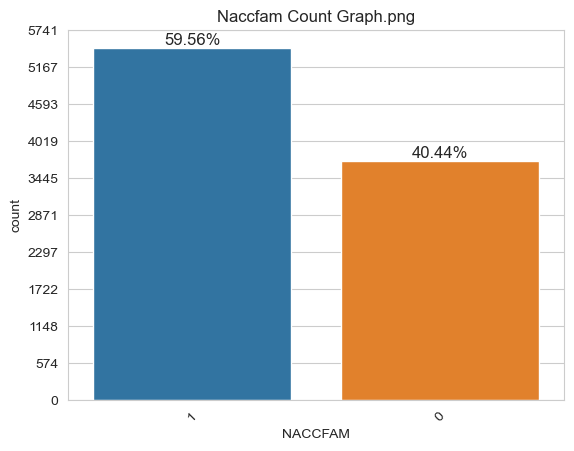

   NACCNE4S      Ratio
0      5656  61.612200
1      3036  33.071895
2       488   5.315904
########################################## 



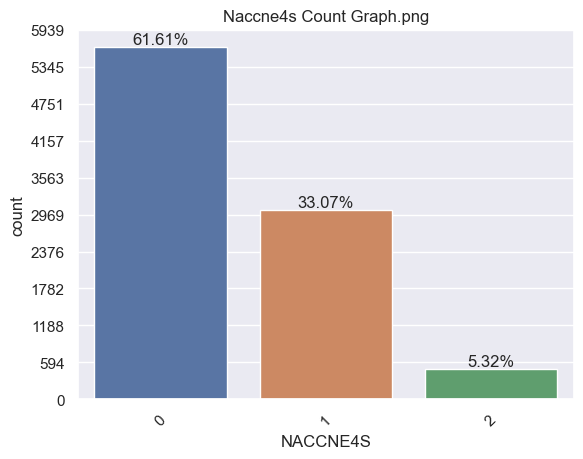

   ANYMEDS      Ratio
1     9020  98.257081
0      160   1.742919
########################################## 



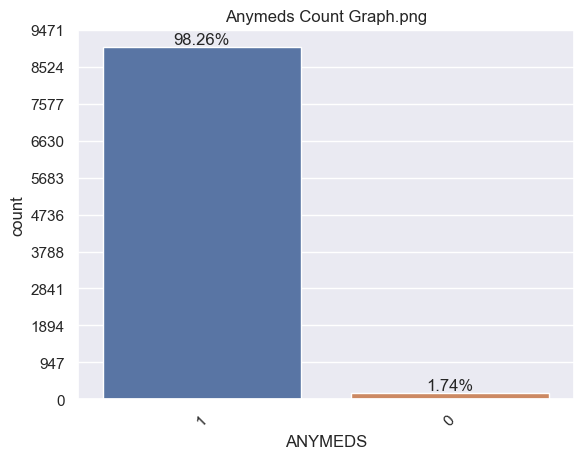

    DEL      Ratio
0  8717  94.956427
1   463   5.043573
########################################## 



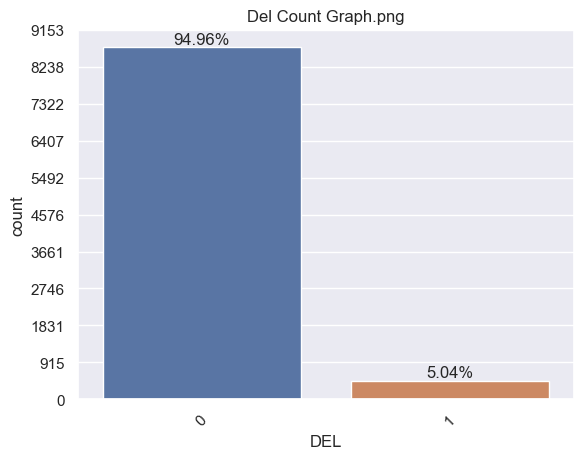

   HALL      Ratio
0  8862  96.535948
1   318   3.464052
########################################## 



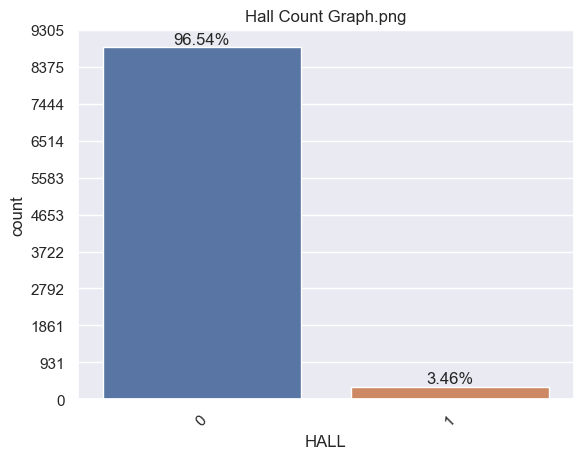

   DEPD      Ratio
0  7097  77.309368
1  2083  22.690632
########################################## 



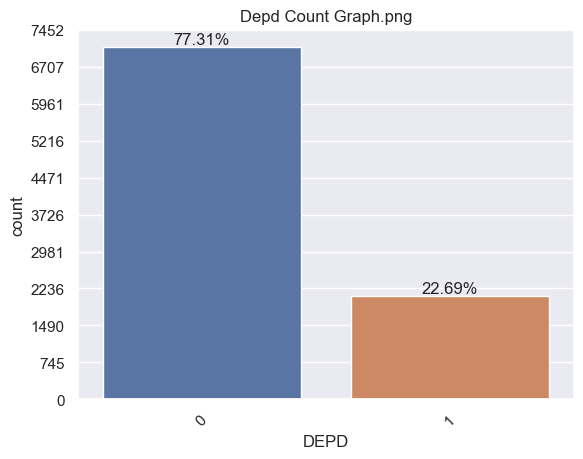

    ANX      Ratio
0  7174  78.148148
1  2006  21.851852
########################################## 



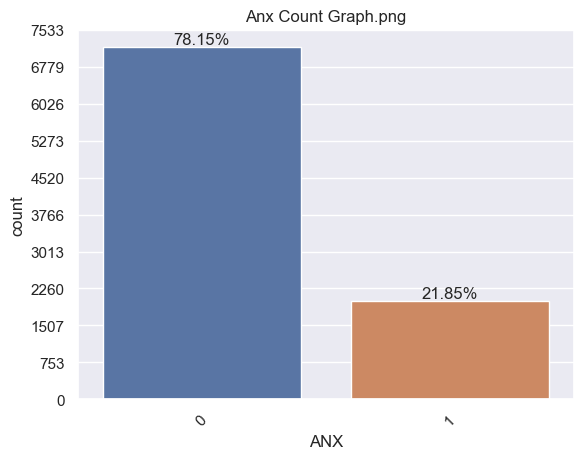

    APA     Ratio
0  7498  81.67756
1  1682  18.32244
########################################## 



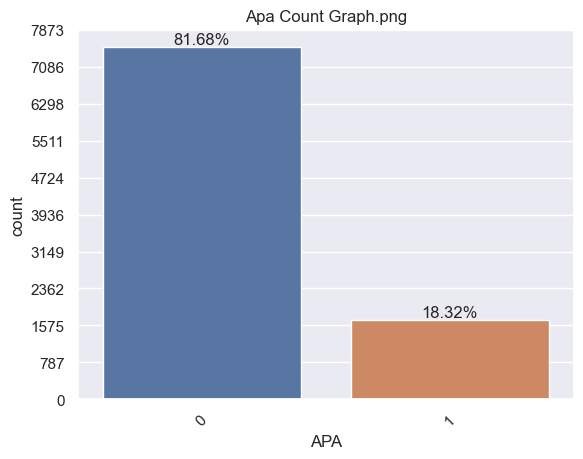

   DISN      Ratio
0  8238  89.738562
1   942  10.261438
########################################## 



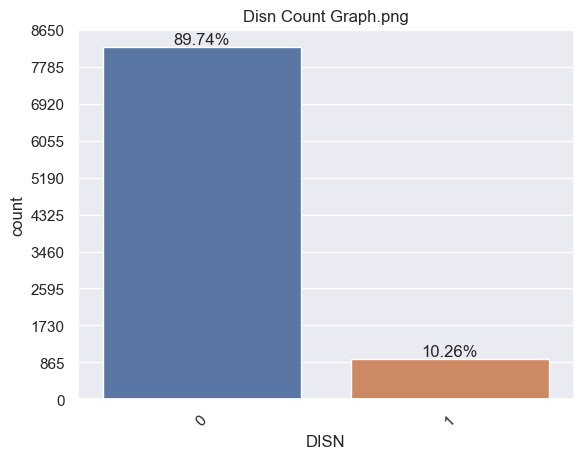

    IRR      Ratio
0  7114  77.494553
1  2066  22.505447
########################################## 



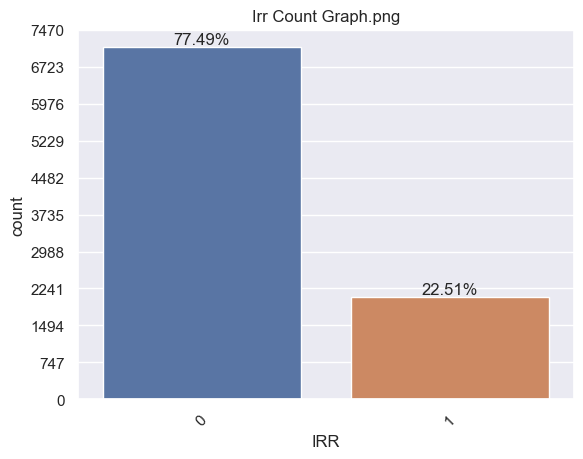

    MOT      Ratio
0  8457  92.124183
1   723   7.875817
########################################## 



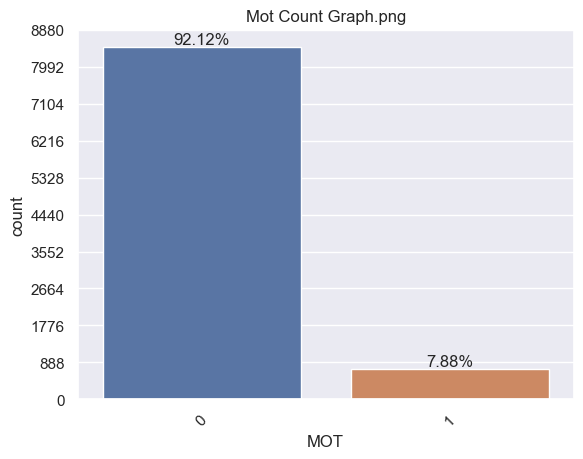

   AGIT      Ratio
0  7783  84.782135
1  1397  15.217865
########################################## 



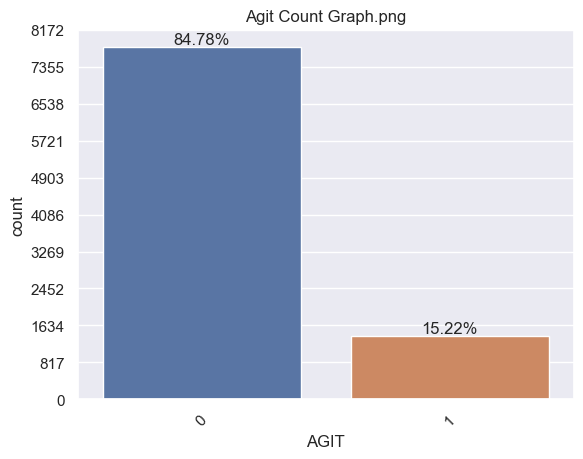

   ELAT      Ratio
0  8977  97.788671
1   203   2.211329
########################################## 



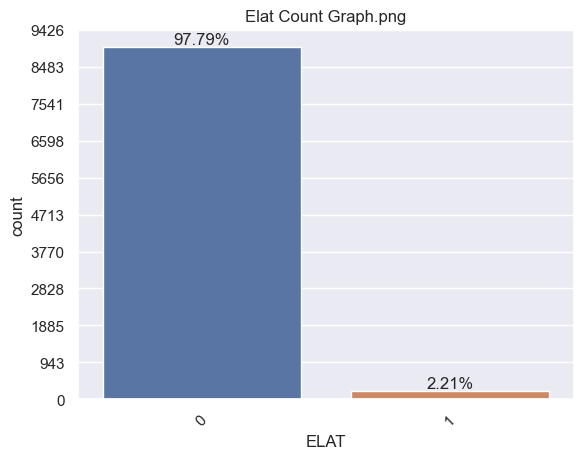

   NITE      Ratio
0  7504  81.742919
1  1676  18.257081
########################################## 



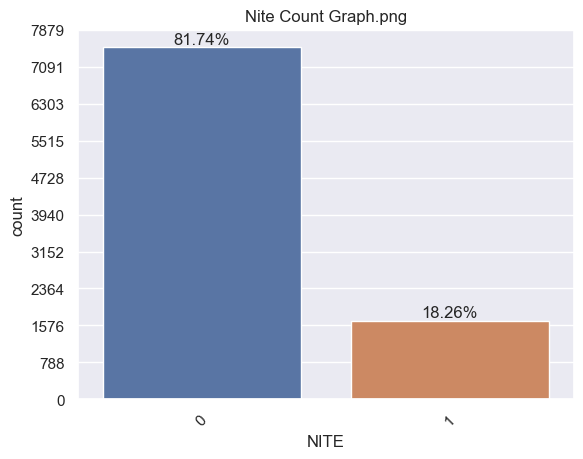

    APP      Ratio
0  7824  85.228758
1  1356  14.771242
########################################## 



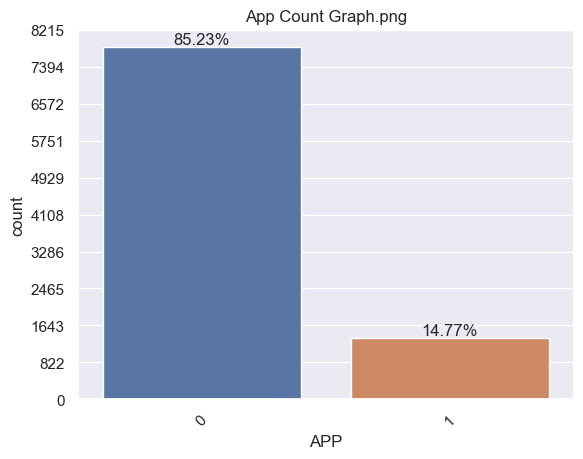

   DROPACT      Ratio
0     7412  80.740741
1     1768  19.259259
########################################## 



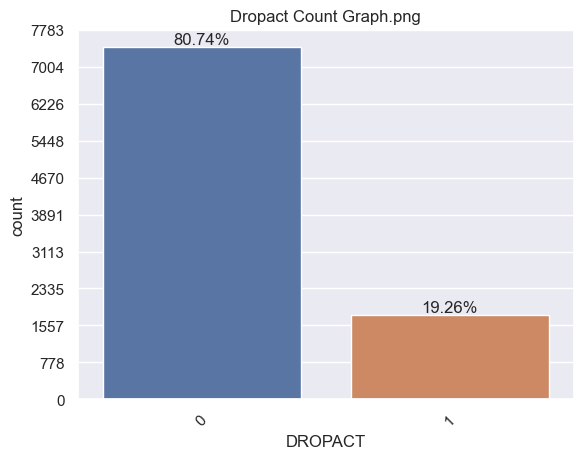

    SEX      Ratio
2  5192  56.557734
1  3988  43.442266
########################################## 



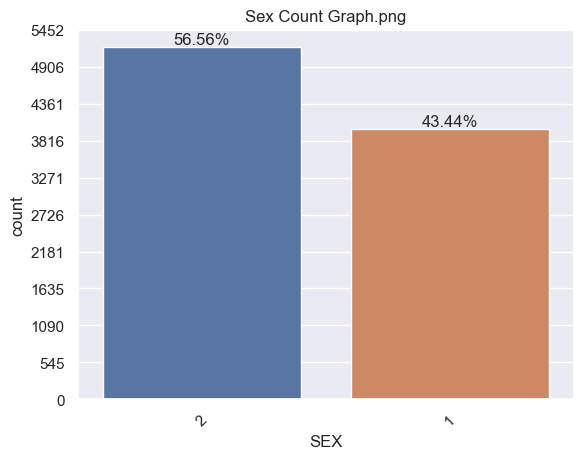

      CDRGLOB      Ratio
0.00     4465  48.638344
0.25     2939  32.015251
0.50     1125  12.254902
1.00      651   7.091503
########################################## 



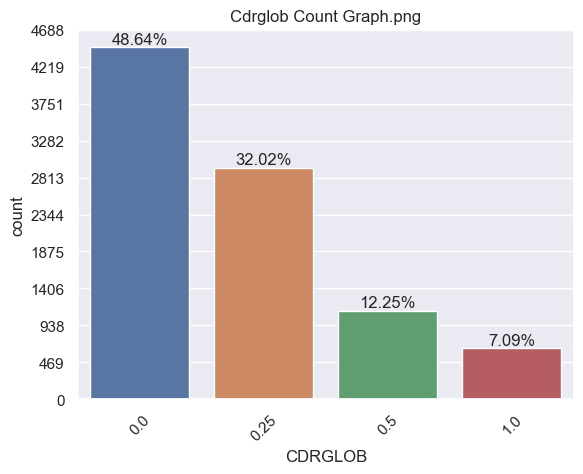

In [18]:
# Kategorik değişkenlerin incelenmesi 

for col in categorical_cols:
    cat_summary(df, col, plot=True)

### Analysis of Numerical Variables

In [19]:
# Sayısal değişkenlerin incelenmesi
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
EDUC,9180.0,16.071351,2.965544,0.0,14.0,16.0,18.0,30.0
NACCMOCA,9180.0,22.237473,6.316181,0.0,19.0,24.0,27.0,30.0
NACCGDS,9180.0,1.898039,2.372321,0.0,0.0,1.0,3.0,15.0
NACCAPOE,9180.0,1.776144,1.026768,1.0,1.0,1.0,2.0,6.0
NACCAMD,9180.0,7.505338,4.226803,0.0,4.0,7.0,10.0,30.0
NACCAGEB,9180.0,73.447059,6.001028,65.0,69.0,73.0,77.0,103.0


count    9180.000000
mean       16.071351
std         2.965544
min         0.000000
5%         12.000000
10%        12.000000
20%        13.000000
30%        15.000000
40%        16.000000
50%        16.000000
60%        18.000000
70%        18.000000
80%        18.000000
90%        20.000000
95%        20.000000
99%        21.000000
max        30.000000
Name: EDUC, dtype: float64


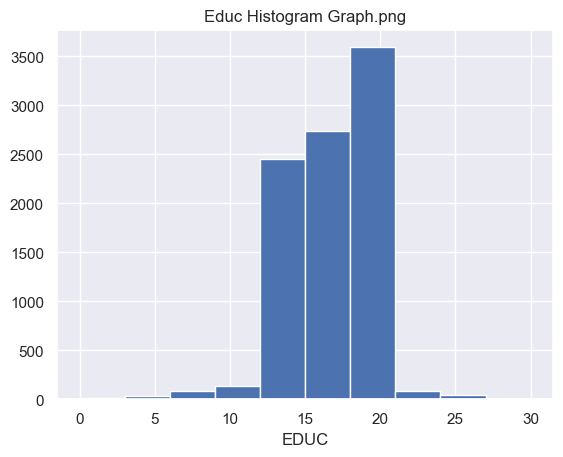

count    9180.000000
mean       22.237473
std         6.316181
min         0.000000
5%          9.000000
10%        13.000000
20%        18.000000
30%        21.000000
40%        23.000000
50%        24.000000
60%        25.000000
70%        26.000000
80%        27.000000
90%        29.000000
95%        29.000000
99%        30.000000
max        30.000000
Name: NACCMOCA, dtype: float64


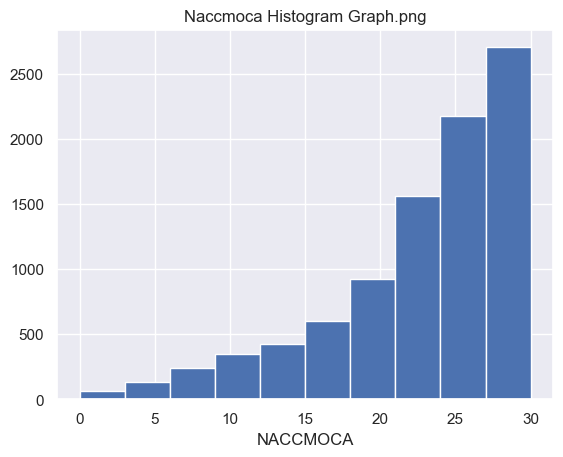

count    9180.000000
mean        1.898039
std         2.372321
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         2.000000
70%         2.000000
80%         3.000000
90%         5.000000
95%         7.000000
99%        11.000000
max        15.000000
Name: NACCGDS, dtype: float64


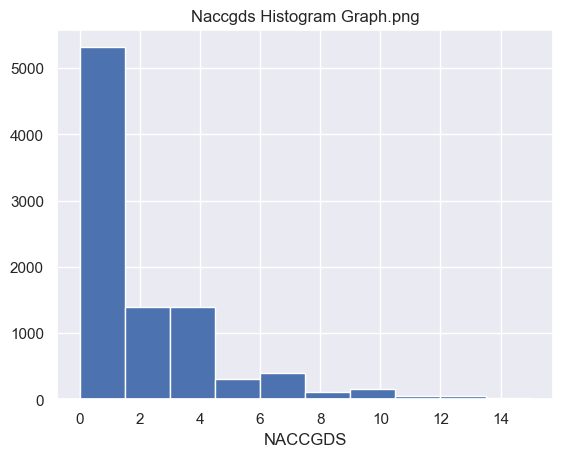

count    9180.000000
mean        1.776144
std         1.026768
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         3.000000
95%         4.000000
99%         5.000000
max         6.000000
Name: NACCAPOE, dtype: float64


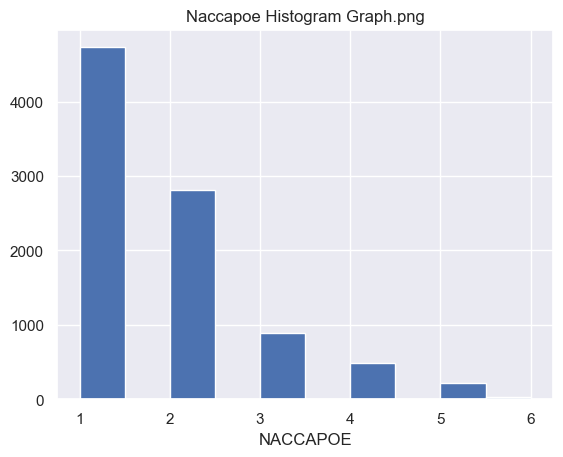

count    9180.000000
mean        7.505338
std         4.226803
min         0.000000
5%          1.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         7.000000
60%         8.000000
70%         9.000000
80%        11.000000
90%        13.000000
95%        15.000000
99%        20.000000
max        30.000000
Name: NACCAMD, dtype: float64


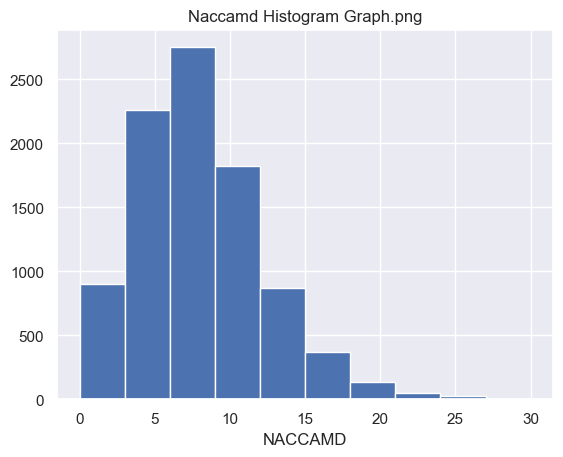

count    9180.000000
mean       73.447059
std         6.001028
min        65.000000
5%         65.000000
10%        66.000000
20%        68.000000
30%        69.000000
40%        71.000000
50%        73.000000
60%        74.000000
70%        76.000000
80%        79.000000
90%        82.000000
95%        84.000000
99%        89.000000
max       103.000000
Name: NACCAGEB, dtype: float64


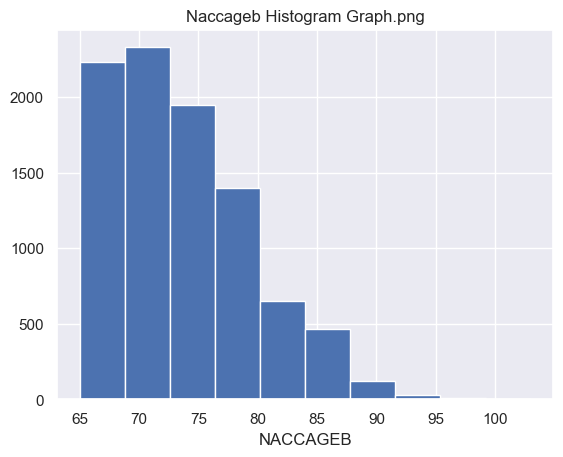

In [20]:
for col in numerical_cols:
    num_summary(df,col,True)

### Correlation Matrix 

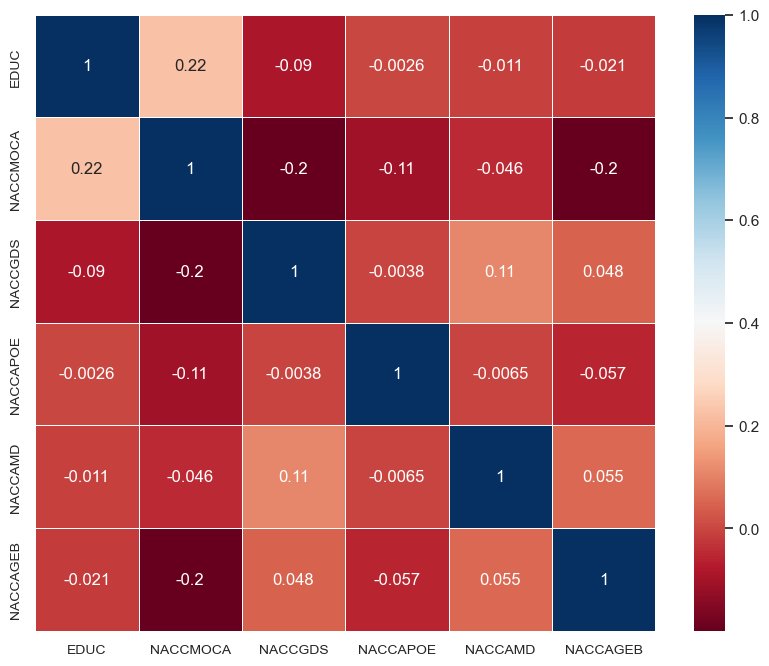

In [21]:
# Sayısal değişkenlerin birbiri ile korelasyonu 

correlation_matrix(df, numerical_cols)

### Examination of numeric variables with Target variable

In [22]:
# Target ile sayısal değişkenlerin incelenmesi

target = "CDRGLOB"

for col in numerical_cols:
    target_summary_with_numerical_data(df, target ,col)

              EDUC
CDRGLOB           
0.00     16.303247
0.25     16.023137
0.50     15.656889
1.00     15.414747


          NACCMOCA
CDRGLOB           
0.00     25.991489
0.25     21.994896
0.50     15.470222
1.00      9.279570


          NACCGDS
CDRGLOB          
0.00     1.240314
0.25     2.436883
0.50     2.768889
1.00     2.471582


         NACCAPOE
CDRGLOB          
0.00     1.679283
0.25     1.811841
0.50     1.948444
1.00     1.981567


          NACCAMD
CDRGLOB          
0.00     7.187682
0.25     7.714869
0.50     7.847111
1.00     8.147465


          NACCAGEB
CDRGLOB           
0.00     72.393505
0.25     74.076216
0.50     74.886222
1.00     75.345622




## Feature Engineering & Data Preprocessing

### Outliers

#### Finding Outliers

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit, up_limit

In [24]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [25]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

EDUC True
NACCMOCA True
NACCGDS True
NACCAPOE True
NACCAMD True
NACCAGEB True


#### Accessing Outliers

In [26]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [27]:
for col in numerical_cols:
  grab_outliers(df,col,True)

     EDUC  NACCMOCA  NACCFAM  NACCGDS  NACCNE4S  NACCAPOE  ANYMEDS  NACCAMD  \
17      3        14        0        5         0         1        1        3   
33      3        12        0        3         0         1        1        6   
66     25        10        0        3         1         2        1       14   
95     26         8        0        8         0         1        1        9   
104     6        14        0        8         0         1        1        1   

     DEL  HALL  DEPD  ANX  APA  DISN  IRR  MOT  AGIT  ELAT  NITE  APP  \
17     1     0     0    0    0     0    1    0     1     0     1    1   
33     0     0     1    1    1     0    0    1     0     0     1    1   
66     0     0     0    1    0     0    0    1     0     0     1    1   
95     0     0     0    0    0     0    0    0     0     0     0    0   
104    0     0     1    1    0     0    0    0     0     0     0    0   

     DROPACT  NACCAGEB  SEX  CDRGLOB  
17         1        76    1     0.50  
33      

#### Solving the Outlier Problem

In [28]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
for col in numerical_cols:
    replace_with_thresholds(df, col)

In [30]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

EDUC False
NACCMOCA False
NACCGDS False
NACCAPOE False
NACCAMD False
NACCAGEB False


### Missing Values

In [31]:
def missing_values_table(dataframe, na_name=False):
    
    # Column Names with Missing Values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of Missing Values of One Column
    number_of_missing_values = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Percentage Distribution of Missing Data
    percentage_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Dataframe with Missing Data
    missing_df = pd.concat([number_of_missing_values, np.round(percentage_ratio, 2)], axis=1, keys=['number_of_missing_values', 'percentage_ratio'])
    
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [32]:
missing_values_table(df)

Empty DataFrame
Columns: [number_of_missing_values, percentage_ratio]
Index: []


### Feature Extraction

- The feature extraction was determined according to the form values in the PDF file given to us.

| Form                                                | Variable Name | Short Descriptor                                                  | Variable Type         | Source |
|-----------------------------------------------------|---------------|-------------------------------------------------------------------|-----------------------|--------|
| A1 Subject Demographics                             | EDUC          | Years of education                                                | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | MARISTAT*     | Marital Status                                                    | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | INDEPEND*     | Level of Independence                                             | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | RESIDENC*     | Type of Residence                                                 | Original UDS Question | v1-3   |
| A1 Subject Demographics                             | NACCAGEB      | Subject's age at initial visit                                    | NACC derived variable | v1-3   |
| A1 Subject Demographics                             | SEX           | Subject's sex                                                     | Original UDS Question | v1-3   |
| A3 Subject Family History                           | NACCFAM       | Indicator of first-degree family member with cognitive impairment | NACC derived variable | v1-3   |
| A4 Subject Medications                              | ANYMEDS       | Subject taking any medications                                    | Original UDS Question | v1-3   |
| A4 Subject Medications                              | NACCAMD       | Total number of medications reported at each visit                | NACC derived variable | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DEL           | Delusions in the last month                                       | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | HALL          | Hallucinations in the last month                                  | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DEPD          | Depression or dysphoria in the last month                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | ANX           | Anxiety in the last month                                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | APA           | Apathy or indifference in the last month                          | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | DISN          | Disinhibition in the last month                                   | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | IRR           | Irritability or lability in the last month                        | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | MOT           | Motor disturbance in the last month                               | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | AGIT          | Agitation or aggression in the last month                         | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | ELAT          | Elation or euphoria in the last month                             | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | NITE          | Nighttime behaviors in the last month                             | Original UDS Question | v1-3   |
| B5 Neuropsychiatric Inventory Questionnaire (NPI-Q) | APP           | Appetite and eating problems in the last month                    | Original UDS Question | v1-3   |
| B6 Geriatric Depression Scale (GDS)                 | NACCGDS       | Total GDS Score                                                   | NACC derived variable | v1-3   |
| B6 Geriatric Depression Scale (GDS)                 | DROPACT       | Have you dropped many of your activities and interests?           | Original UDS Question | v1-3   |
| C2 Neuropsychological Battery Scores                | NACCMOCA      | MoCA Total Score - corrected for education                        | NACC derived variable | v3     |

*: We don't have this data.

In [33]:
# Cinsiyete bağlı olarak eğitim seviyesinin Alzheimer derecesinin önem durumu
"""
Eğitim seviyesi:

"""
df.loc[(12 <= df["EDUC"]) & (df["EDUC"]< 16) & (df["SEX"] == 1), "NEW_SEX_EDUC_CAT"] = "high_school_male"
df.loc[(16 <= df["EDUC"]) & (df["EDUC"]< 18) & (df["SEX"] == 1), "NEW_SEX_EDUC_CAT"] = "bachelor_male"
df.loc[(18 <= df["EDUC"]) & (df["EDUC"]< 20) & (df["SEX"] == 1), "NEW_SEX_EDUC_CAT"] = "master_male"
df.loc[(df["EDUC"] >= 20) & (df["SEX"] == 1), "NEW_SEX_EDUC_CAT"] = "doctorate_male"

df.loc[(12 <= df["EDUC"]) & (df["EDUC"]< 16) & (df["SEX"] == 2), "NEW_SEX_EDUC_CAT"] = "high_school_female"
df.loc[(16 <= df["EDUC"]) & (df["EDUC"]< 18) & (df["SEX"] == 2), "NEW_SEX_EDUC_CAT"] = "bachelor_female"
df.loc[(18 <= df["EDUC"]) & (df["EDUC"]< 20) & (df["SEX"] == 2), "NEW_SEX_EDUC_CAT"] = "master_female"
df.loc[(df["EDUC"] >= 20) & (df["SEX"] == 2), "NEW_SEX_EDUC_CAT"] = "doctorate_female"

In [34]:
# Cinsiyete bağlı olarak ilk ziyaret yaşının Alzheimer derecesinin önem durumu
"""
Yaş Aralığı 
18 - 40
40 - 60
60 - 80
80 - 100
100 - 120
"""
df.loc[(18 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 40) & (df["SEX"] == 1), "NEW_INITIAL_VISIT_SEX_CAT"] = "young_adults_male"
df.loc[(40 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 60) & (df["SEX"] == 1), "NEW_INITIAL_VISIT_SEX_CAT"] = "middle_aged_male"
df.loc[(60 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 80) & (df["SEX"] == 1), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_60_80_male"
df.loc[(80 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 100) & (df["SEX"] == 1), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_80_100_male"
df.loc[(100 <= df["NACCAGEB"]) & (df["NACCAGEB"]<= 120) & (df["SEX"] == 1), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_100_120_male"

df.loc[(40 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 60) & (df["SEX"] == 2), "NEW_INITIAL_VISIT_SEX_CAT"] = "middle_aged_female"
df.loc[(60 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 80) & (df["SEX"] == 2), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_60_80_female"
df.loc[(80 <= df["NACCAGEB"]) & (df["NACCAGEB"]< 100) & (df["SEX"] == 2), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_80_100_female"
df.loc[(100 <= df["NACCAGEB"]) & (df["NACCAGEB"]<= 120) & (df["SEX"] == 2), "NEW_INITIAL_VISIT_SEX_CAT"] = "old_60_80_female"

In [35]:
# Herhangi bir ilaç kullanan ve buna ilaveten her ziyarette bildirilen toplam ilaç sayısının Alzheimer derecesinin önem durumu
"""
Toplam ilaç sayısı aralığı:
0 - 20
20 - 40
none
"""

df.loc[(df["ANYMEDS"] == 1) & (df["NACCAMD"] >=0) & (df["NACCAMD"] <=20) & (df["SEX"] == 1),
       "NEW_A4_SUBJECT_MEDICATIONS"] = "male_using_few_medications"
df.loc[(df["ANYMEDS"] == 1) & (df["NACCAMD"] >20) & (df["NACCAMD"] <=40) & (df["SEX"] == 1),
       "NEW_A4_SUBJECT_MEDICATIONS"] = "male_using_lot_medications"
df.loc[(df["ANYMEDS"] == 0) &  (df["NACCAMD"] != -4) & (df["SEX"] == 1), "NEW_A4_SUBJECT_MEDICATIONS"] = "male_not_using_medications"
df.loc[(df["ANYMEDS"] == -4) & (df["NACCAMD"] == -4) & (df["SEX"] == 1), "NEW_A4_SUBJECT_MEDICATIONS"] = "male_unknown_data"

df.loc[(df["ANYMEDS"] == 1) & (df["NACCAMD"] >=0) & (df["NACCAMD"] <= 20) & (df["SEX"] == 2),
       "NEW_A4_SUBJECT_MEDICATIONS"] = "female_using_few_medications"
df.loc[(df["ANYMEDS"] == 1) & (df["NACCAMD"] >20) & (df["NACCAMD"] <= 40) & (df["SEX"] == 2),
       "NEW_A4_SUBJECT_MEDICATIONS"] = "female_using_lot_medications"
df.loc[(df["ANYMEDS"] == 0)  & (df["NACCAMD"] != -4) & (df["SEX"] == 2), "NEW_A4_SUBJECT_MEDICATIONS"] = "female_not_using_medications"
df.loc[(df["ANYMEDS"] == -4) & (df["NACCAMD"] == -4) & (df["SEX"] == 2), "NEW_A4_SUBJECT_MEDICATIONS"] = "female_unknown_data"

In [36]:
# Cinsiye dağılımına göre sanrı ve halüsinasyon görüp görmeyen kişilerde Alzheimer derecesinin önem durumu

column_names1 = ["DEL","HALL"]

df.loc[(df[column_names1 ].sum(axis=1) == 2) & (df["SEX"] == 1), "NEW_DEL_HALL"] = "male_both_del_hall"
df.loc[(df[column_names1 ].sum(axis=1) == 1) & (df["SEX"] == 1), "NEW_DEL_HALL"] = "male_del_or_hall"
df.loc[(df[column_names1 ].sum(axis=1) == 0) & (df["SEX"] == 1), "NEW_DEL_HALL"] = "male_none"

df.loc[(df[column_names1 ].sum(axis=1) == 2) & (df["SEX"] == 2), "NEW_DEL_HALL"] = "female_both_del_hall"
df.loc[(df[column_names1 ].sum(axis=1) == 1) & (df["SEX"] == 2), "NEW_DEL_HALL"] = "female_del_or_hall"
df.loc[(df[column_names1 ].sum(axis=1) == 0) & (df["SEX"] == 2), "NEW_DEL_HALL"] = "female_none"

In [37]:
# Cinsiye dağılımına göre depresyon, kaygı ve ilgisizlik hissi olup olmayan kişilerde Alzheimer'in derecesinin önem durumu

column_names2 = ["DEPD","ANX","APA"]

df.loc[(df[column_names2].sum(axis=1) == 3)& (df["SEX"] == 1), "NEW_DEP_ANX_APA"] = "male_all_of_them"
df.loc[(df[column_names2].sum(axis=1) == 2)& (df["SEX"] == 1), "NEW_DEP_ANX_APA"] = "male_depd_or_anx_or_apa"
df.loc[(df[column_names2].sum(axis=1) == 1)& (df["SEX"] == 1), "NEW_DEP_ANX_APA"] = "male_just_one"
df.loc[(df[column_names2].sum(axis=1) == 0)& (df["SEX"] == 1), "NEW_DEP_ANX_APA"] = "male_none"
       
df.loc[(df[column_names2].sum(axis=1) == 3)& (df["SEX"] == 2), "NEW_DEP_ANX_APA"] = "female_all_of_them"
df.loc[(df[column_names2].sum(axis=1) == 2)& (df["SEX"] == 2), "NEW_DEP_ANX_APA"] = "female_depd_or_anx_or_apa"
df.loc[(df[column_names2].sum(axis=1) == 1)& (df["SEX"] == 2), "NEW_DEP_ANX_APA"] = "female_just_one"
df.loc[(df[column_names2].sum(axis=1) == 0)& (df["SEX"] == 2), "NEW_DEP_ANX_APA"] = "female_none"

In [38]:
# Cinsiye dağılımına göre sinirlilik ve saldırganlık hissi olup olmayan kişilerde Alzheimer'in derecesinin önem durumu

column_names3 = ["IRR","AGIT"]

df.loc[(df[column_names3].sum(axis=1) == 2)& (df["SEX"] == 1), "NEW_IRR_AGIT"] = "male_both_irr_agit"
df.loc[(df[column_names3].sum(axis=1) == 1)& (df["SEX"] == 1), "NEW_IRR_AGIT"] = "male_irr_or_agit"
df.loc[(df[column_names3].sum(axis=1) == 0)& (df["SEX"] == 1), "NEW_IRR_AGIT"] = "male_none"

df.loc[(df[column_names3].sum(axis=1) == 2)& (df["SEX"] == 2), "NEW_IRR_AGIT"] = "female_both_irr_agit"
df.loc[(df[column_names3].sum(axis=1) == 1)& (df["SEX"] == 2), "NEW_IRR_AGIT"] = "female_irr_or_agit"
df.loc[(df[column_names3].sum(axis=1) == 0)& (df["SEX"] == 2), "NEW_IRR_AGIT"] = "female_none"

In [39]:
# Tüm Nöropsikiyatrik envanter anketinde yer alan özelliklerin cinsiyet ile Alzheimer derecesinde önem durumu

"""
Eğer kişi nöropskiyatrik envanter anketinde verdiği cevaplarda 12 farklı soru içerisinde 6'dan düşük puan aldıysa
low_neuropsy, yüksek aldıysa high_neuropsy olarak sınıflandırdım.

Form içerisinde B6 değerlerinin tamamını içeriyor.
"""

column_names4 = ["DEL","HALL","DEPD","ANX","APA","DISN","IRR","MOT","AGIT","ELAT","NITE","APP"]

df.loc[(df[column_names4].sum(axis=1) <= 6) & (df["SEX"] == 1), "NEW_NEUROPSYCHIATRIC_RESULT"] = "low_neuropsy_male"
df.loc[(df[column_names4].sum(axis=1) > 6) & (df["SEX"] == 1), "NEW_NEUROPSYCHIATRIC_RESULT"] = "high_neuropsy_male"
df.loc[(df[column_names4].sum(axis=1) <= 6) & (df["SEX"] == 2), "NEW_NEUROPSYCHIATRIC_RESULT"] = "low_neuropsy_female"
df.loc[(df[column_names4].sum(axis=1) > 6) & (df["SEX"] == 2), "NEW_NEUROPSYCHIATRIC_RESULT"] = "high_neuropsy_female"

In [40]:
# Tüm Geriatrik Depresyon Ölçeğinde yer alan özelliklerin cinsiyet ile Alzheimer derecesinin önem durumu
"""
Eğer kişi geriatrik depresyon ölçeğinde 8'den küçük sonuç alırsa bu low_depression olarak sınıflandırdım.
Eğer kişi geriatrik depresyon ölçeğinde 8'den büyük sonuç alırsa bu high_depression olarak sınıflandırdım.
"""

df.loc[(df["NACCGDS"] >= 0) & (df["NACCGDS"] <=8) & (df["SEX"] == 1), "NEW_B6_GERIATRIC_DEPRESSION_SCALE"] = "low_depression_male"
df.loc[(df["NACCGDS"] >= 0) & (df["NACCGDS"] <=8) & (df["SEX"] == 2), "NEW_B6_GERIATRIC_DEPRESSION_SCALE"] = "low_depression_female"
df.loc[(df["NACCGDS"] > 9) & (df["NACCGDS"] <=15) & (df["SEX"] == 1), "NEW_B6_GERIATRIC_DEPRESSION_SCALE"] = "high_depression_male"
df.loc[(df["NACCGDS"] > 9) & (df["NACCGDS"] <=15) & (df["SEX"] == 2), "NEW_B6_GERIATRIC_DEPRESSION_SCALE"] = "high_depression_female"

In [43]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df)

Observations: 9180
Variables: 32
categorical_cols: 28
numerical_cols: 4
cardinal_cols: 0
nominal_cols: 20


                    NEW_SEX_EDUC_CAT      Ratio
high_school_female              1883  20.511983
master_female                   1373  14.956427
bachelor_female                 1349  14.694989
master_male                     1145  12.472767
bachelor_male                   1111  12.102397
high_school_male                 847   9.226580
doctorate_male                   792   8.627451
doctorate_female                 414   4.509804
########################################## 



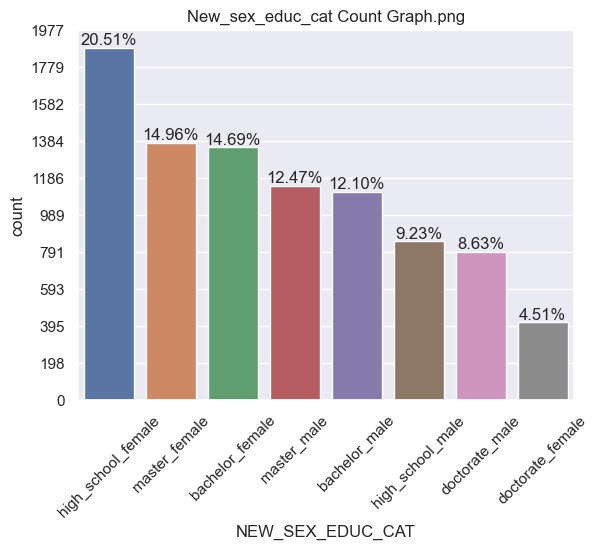

                   NEW_INITIAL_VISIT_SEX_CAT      Ratio
old_60_80_female                        4372  47.625272
old_60_80_male                          3234  35.228758
old_80_100_female                        820   8.932462
old_80_100_male                          754   8.213508
########################################## 



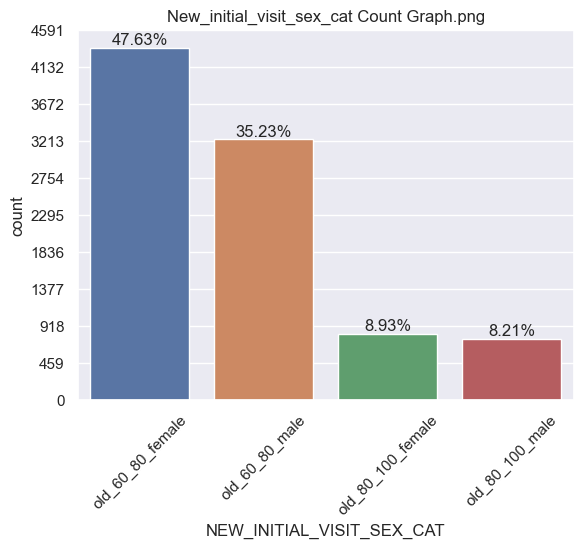

                              NEW_A4_SUBJECT_MEDICATIONS      Ratio
female_using_few_medications                        5100  55.555556
male_using_few_medications                          3920  42.701525
female_not_using_medications                          92   1.002179
male_not_using_medications                            68   0.740741
########################################## 



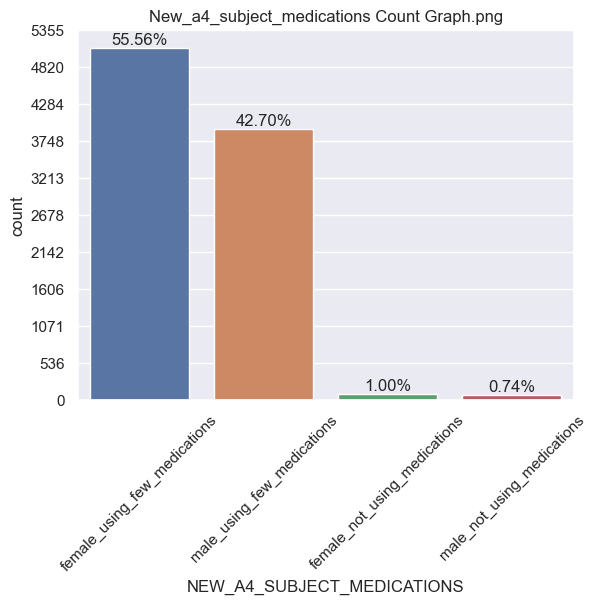

                      NEW_DEL_HALL      Ratio
female_none                   4884  53.202614
male_none                     3657  39.836601
male_del_or_hall               255   2.777778
female_del_or_hall             242   2.636166
male_both_del_hall              76   0.827887
female_both_del_hall            66   0.718954
########################################## 



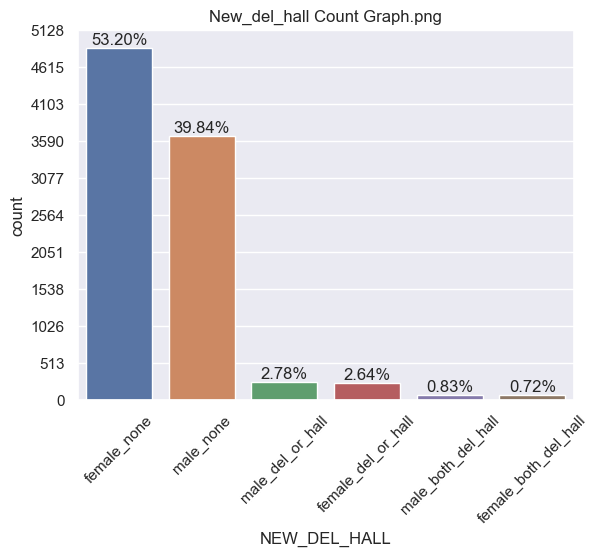

                           NEW_DEP_ANX_APA      Ratio
female_none                           3363  36.633987
male_none                             2271  24.738562
female_just_one                        995  10.838780
male_just_one                          854   9.302832
female_depd_or_anx_or_apa              604   6.579521
male_depd_or_anx_or_apa                565   6.154684
male_all_of_them                       298   3.246187
female_all_of_them                     230   2.505447
########################################## 



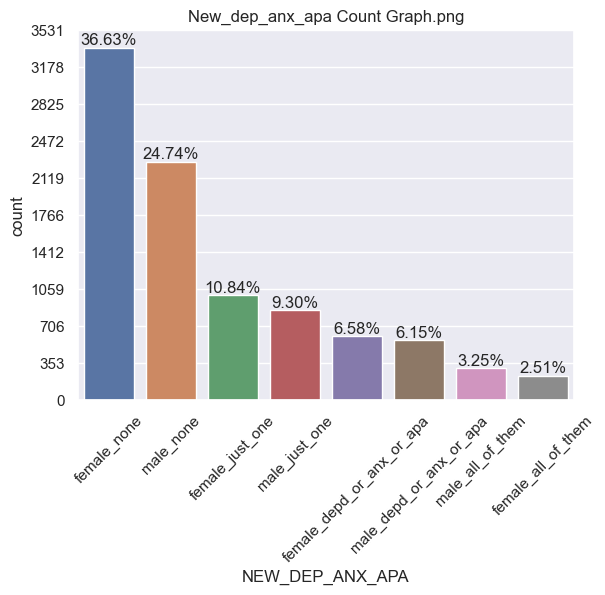

                      NEW_IRR_AGIT      Ratio
female_none                   4044  44.052288
male_none                     2655  28.921569
male_irr_or_agit               788   8.583878
female_irr_or_agit             711   7.745098
male_both_irr_agit             545   5.936819
female_both_irr_agit           437   4.760349
########################################## 



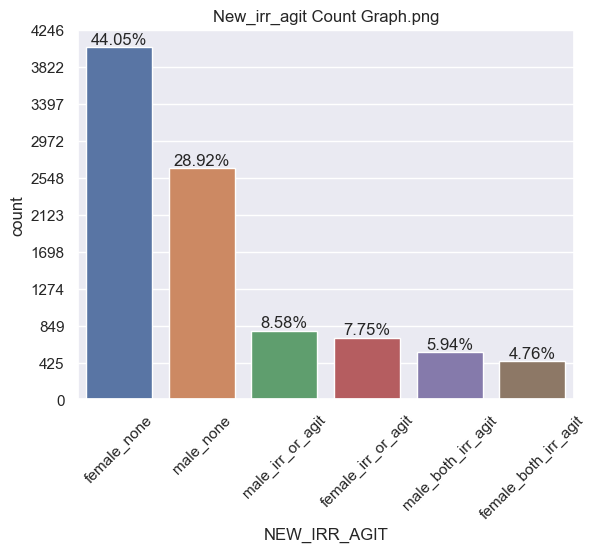

                      NEW_NEUROPSYCHIATRIC_RESULT      Ratio
low_neuropsy_female                          5019  54.673203
low_neuropsy_male                            3744  40.784314
high_neuropsy_male                            244   2.657952
high_neuropsy_female                          173   1.884532
########################################## 



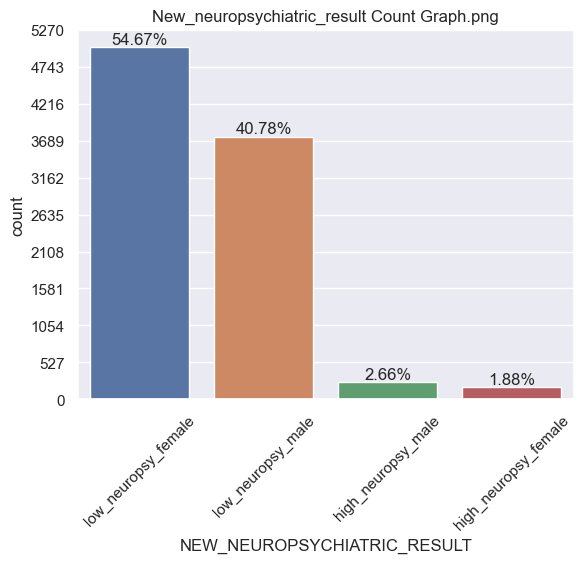

                       NEW_B6_GERIATRIC_DEPRESSION_SCALE      Ratio
low_depression_female                               5192  56.557734
low_depression_male                                 3988  43.442266
########################################## 



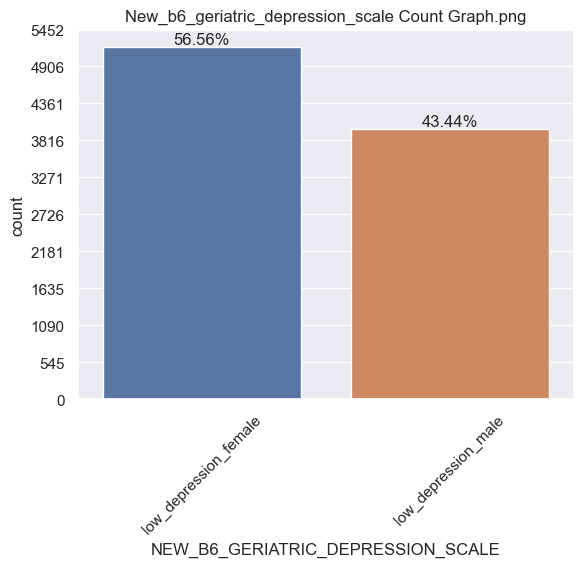

   NACCFAM     Ratio
1     5468  59.56427
0     3712  40.43573
########################################## 



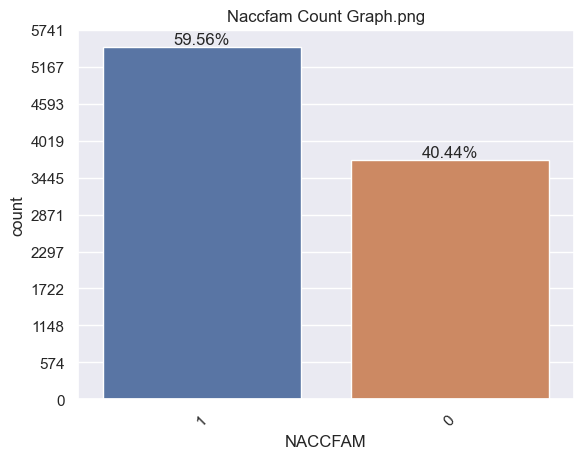

     NACCGDS      Ratio
0.0     3111  33.888889
1.0     2205  24.019608
2.0     1396  15.206972
3.0      855   9.313725
4.0      537   5.849673
7.5      370   4.030501
5.0      313   3.409586
6.0      219   2.385621
7.0      174   1.895425
########################################## 



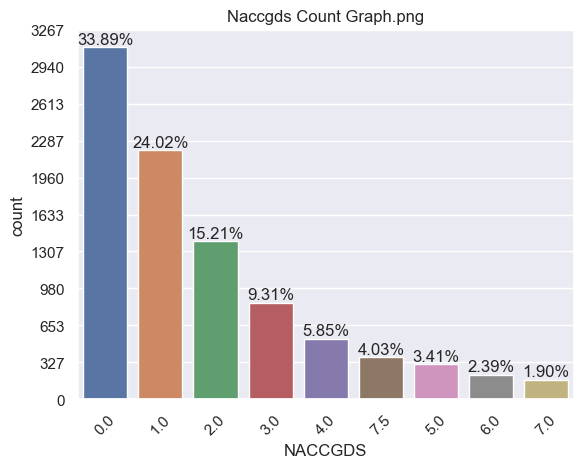

   NACCNE4S      Ratio
0      5656  61.612200
1      3036  33.071895
2       488   5.315904
########################################## 



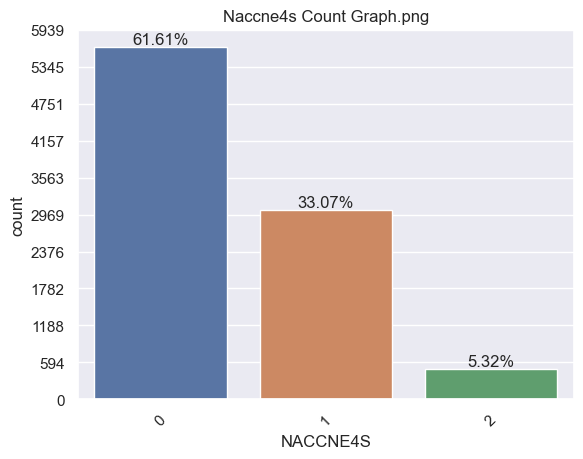

     NACCAPOE      Ratio
1.0      4729  51.514161
2.0      2815  30.664488
3.0       891   9.705882
3.5       745   8.115468
########################################## 



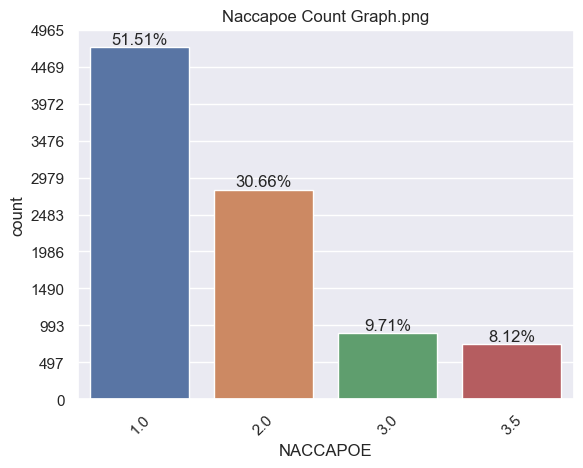

   ANYMEDS      Ratio
1     9020  98.257081
0      160   1.742919
########################################## 



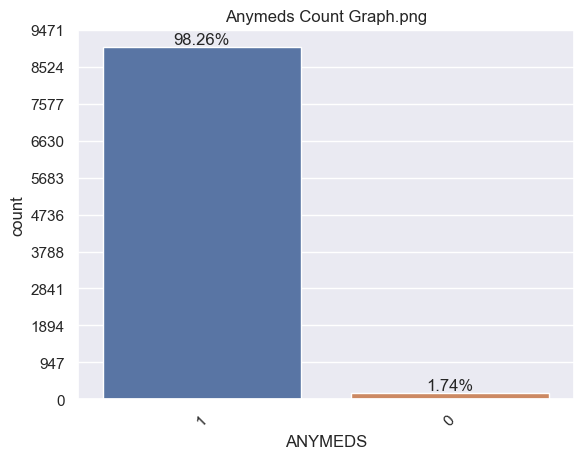

    DEL      Ratio
0  8717  94.956427
1   463   5.043573
########################################## 



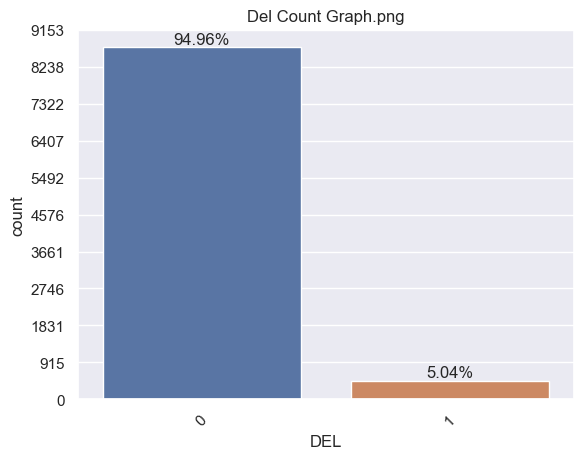

   HALL      Ratio
0  8862  96.535948
1   318   3.464052
########################################## 



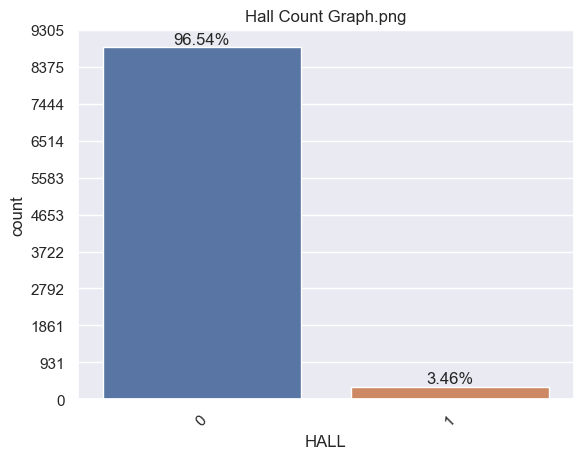

   DEPD      Ratio
0  7097  77.309368
1  2083  22.690632
########################################## 



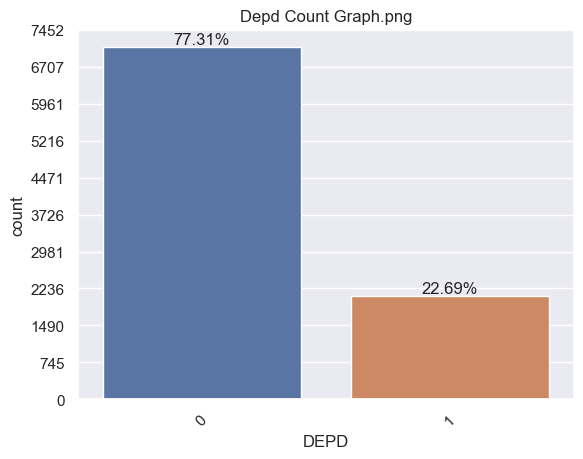

    ANX      Ratio
0  7174  78.148148
1  2006  21.851852
########################################## 



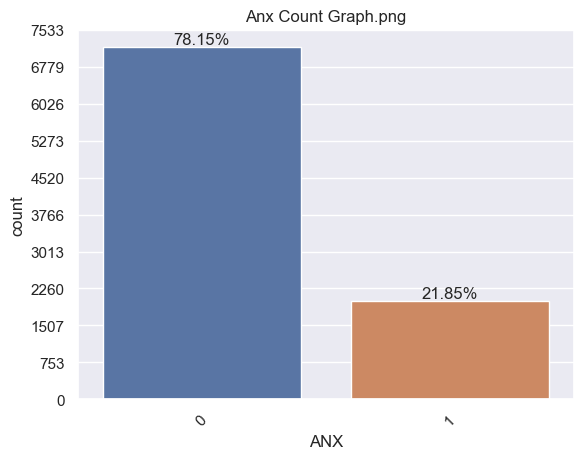

    APA     Ratio
0  7498  81.67756
1  1682  18.32244
########################################## 



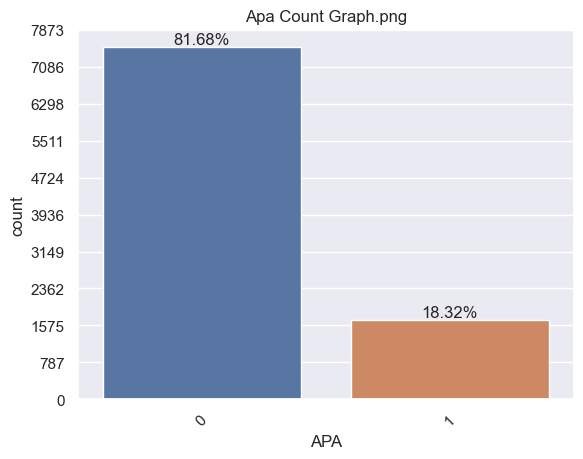

   DISN      Ratio
0  8238  89.738562
1   942  10.261438
########################################## 



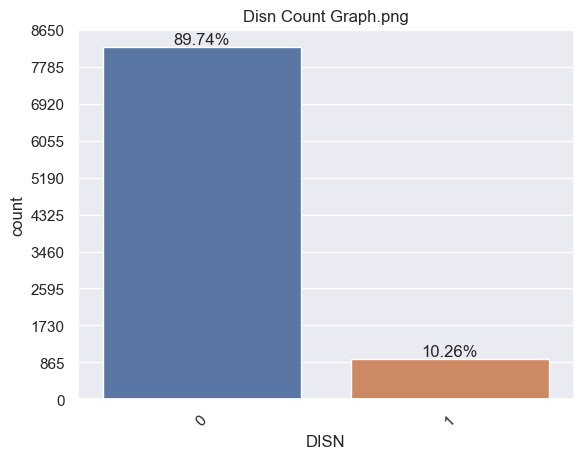

    IRR      Ratio
0  7114  77.494553
1  2066  22.505447
########################################## 



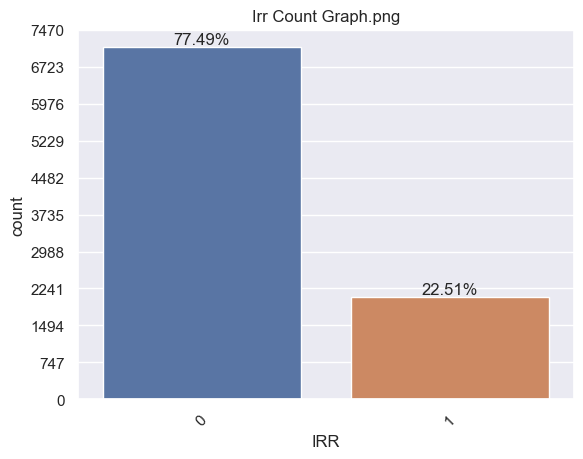

    MOT      Ratio
0  8457  92.124183
1   723   7.875817
########################################## 



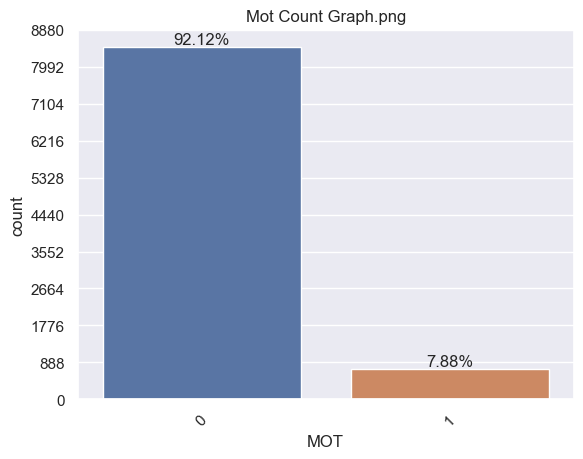

   AGIT      Ratio
0  7783  84.782135
1  1397  15.217865
########################################## 



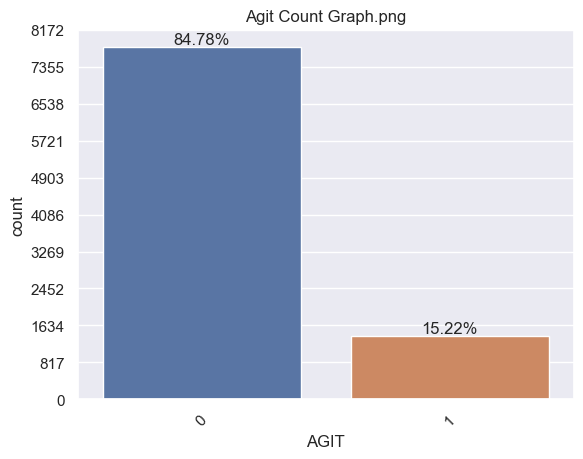

   ELAT      Ratio
0  8977  97.788671
1   203   2.211329
########################################## 



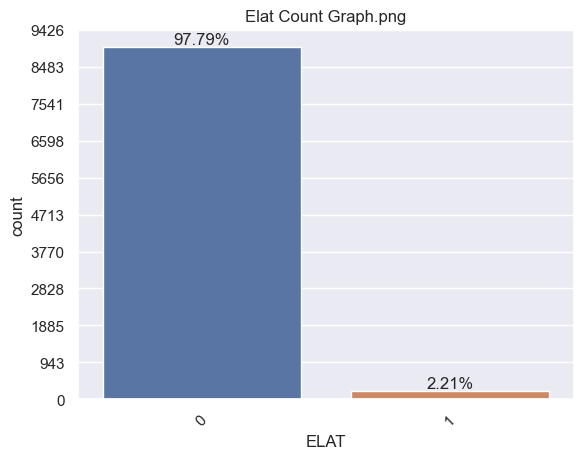

   NITE      Ratio
0  7504  81.742919
1  1676  18.257081
########################################## 



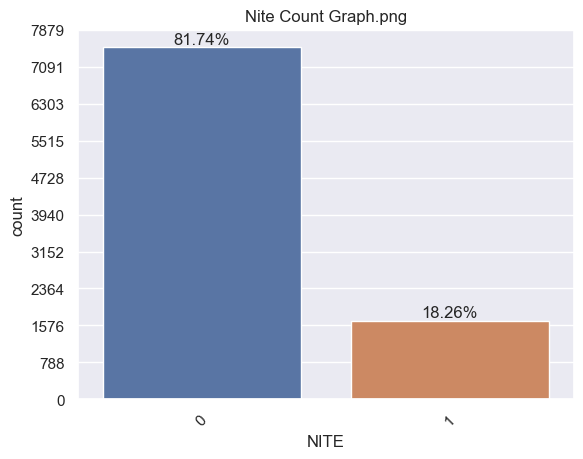

    APP      Ratio
0  7824  85.228758
1  1356  14.771242
########################################## 



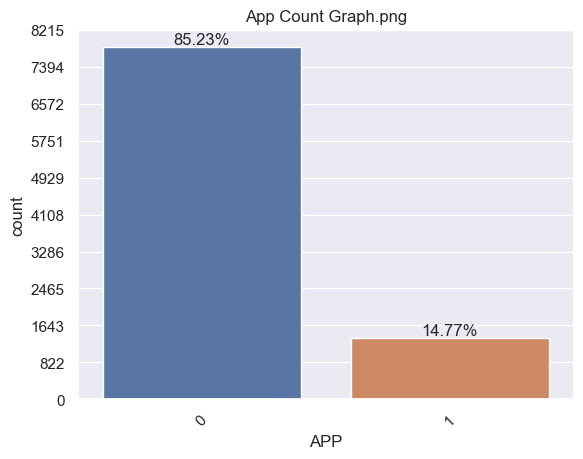

   DROPACT      Ratio
0     7412  80.740741
1     1768  19.259259
########################################## 



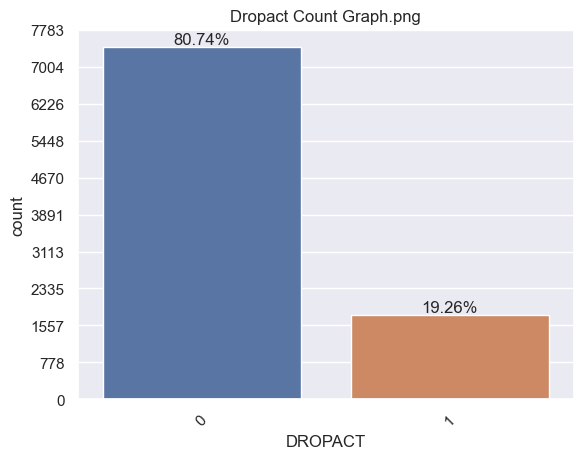

    SEX      Ratio
2  5192  56.557734
1  3988  43.442266
########################################## 



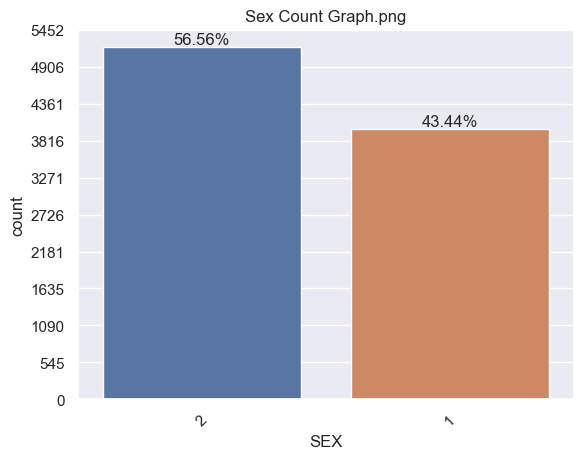

      CDRGLOB      Ratio
0.00     4465  48.638344
0.25     2939  32.015251
0.50     1125  12.254902
1.00      651   7.091503
########################################## 



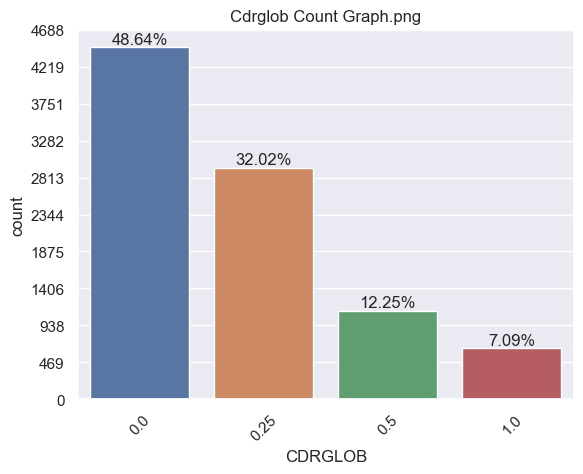

In [44]:
for col in categorical_cols:
    cat_summary(df,col,True)

In [42]:
column_names4 = ["DEL","HALL","DEPD","ANX","APA","DISN","IRR","MOT","AGIT","ELAT","NITE","APP"]

df_pivot = df.pivot_table(values=column_names4,
                   index=["SEX","CDRGLOB"],
                   aggfunc="sum")
df_pivot

AGIT  ANX  APA  APP  DEL  DEPD  DISN  ELAT  HALL  IRR  MOT  NITE
SEX CDRGLOB                                                                  
1   0.00       76  165   93   97    4   210    42     8     6  216   22   150
    0.25      298  348  364  258   50   413   208    42    38  496  101   344
    0.50      224  242  318  228   85   230   173    37    67  270  158   219
    1.00      158  181  206  134   85   108   112    25    72  140  114   145
2   0.00       90  262   78  140    6   323    47    15     8  234   14   234
    0.25      246  444  246  218   56   470   135    36    26  369   93   311
    0.50      171  216  213  176   82   208   120    23    45  211  115   159
    1.00      134  148  164  105   95   121   105    17    56  130  106   114

<Figure size 640x480 with 0 Axes>

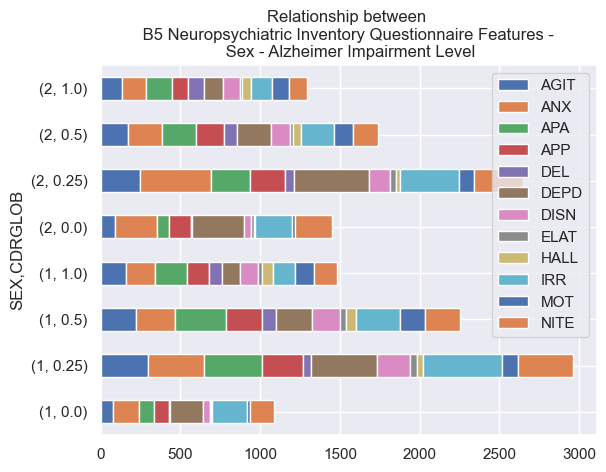

In [43]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df_pivot.plot.barh(stacked=True)
plt.title("Relationship between \n B5 Neuropsychiatric Inventory Questionnaire Features - \n Sex - Alzheimer Impairment Level")
plt.savefig("Relationship between B5 Neuropsychiatric Inventory Questionnaire Features - Sex - Alzheimer Impairment Level.png")

Buradan çıkan sonuç şu:
- Hem kadın hemde erkek bireylerde son bir aydaki saldırganlık, depresyon, anksiyete bozukluğu ve sinirlilik şüpheli bozulma (questionable impairment) olarak sonuca etki ediyor. (2, 0.25) (1, 0.25)
- Alzheimer sorunun yüksek belirti verdiği aralıkta (1.0) ilgisizliğin, sinirliliğin, anksiyete bozukluğun yüksek bir önemi olduğunu gösterir.
- Şüpheli bozulmadan (0.25) - şiddetli bozulma (1.00) aralığına baktığımızda son bir aydaki saldırganlık, depresyon
ve anksiyete bozukluğunun etkilediği kişi sayısında azalma tespit edilmiştir.

### Updating the col names for encoding process

In [44]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df)

Observations: 9180
Variables: 32
categorical_cols: 28
numerical_cols: 4
cardinal_cols: 0
nominal_cols: 20


In [45]:
df.head()

,EDUC,NACCMOCA,NACCFAM,NACCGDS,NACCNE4S,NACCAPOE,ANYMEDS,NACCAMD,DEL,HALL,DEPD,ANX,APA,DISN,IRR,MOT,AGIT,ELAT,NITE,APP,DROPACT,NACCAGEB,SEX,CDRGLOB,NEW_SEX_EDUC_CAT,NEW_INITIAL_VISIT_SEX_CAT,NEW_A4_SUBJECT_MEDICATIONS,NEW_DEL_HALL,NEW_DEP_ANX_APA,NEW_IRR_AGIT,NEW_NEUROPSYCHIATRIC_RESULT,NEW_B6_GERIATRIC_DEPRESSION_SCALE
0,13,21,0,0.0,0,1.0,1,5,0,1,0,0,1,1,1,0,1,0,0,1,0,73,1,0.50,high_school_male,old_60_80_male,male_using_few_medications,male_del_or_hall,male_just_one,male_both_irr_agit,low_neuropsy_male,low_depression_male
1,16,25,1,4.0,0,3.0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,65,1,0.25,bachelor_male,old_60_80_male,male_using_few_medications,male_none,male_depd_or_anx_or_apa,male_none,low_neuropsy_male,low_depression_male
2,10,13,0,7.5,0,3.0,1,7,0,1,0,0,0,0,0,1,0,0,0,1,0,73,2,0.25,NaN,old_60_80_female,female_using_few_medications,female_del_or_hall,female_none,female_none,low_neuropsy_female,low_depression_female
3,20,29,1,3.0,2,3.5,1,13,0,0,1,1,0,0,0,0,0,0,1,0,1,78,1,0.00,doctorate_male,old_60_80_male,male_using_few_medications,male_none,male_depd_or_anx_or_apa,male_none,low_neuropsy_male,low_depression_male
4,17,26,1,0.0,1,2.0,1,12,0,0,1,0,0,0,1,0,0,0,1,0,0,76,1,0.25,bachelor_male,old_60_80_male,male_using_few_medications,male_none,male_just_one,male_irr_or_agit,low_neuropsy_male,low_depression_male


### Encoding

#### Label Encoding

In [46]:
def label_encoder(dataframe, binary_col):
    """
    Apply Label Encoding to all specified categorical columns

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        binary_col (string): The numerical column names are to be retrieved.

    Returns:
        dataframe: Return the new dataframe
    """
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [47]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_B6_GERIATRIC_DEPRESSION_SCALE']

In [48]:
for col in binary_cols:
    df = label_encoder(df, col)

In [49]:
df.head()

,EDUC,NACCMOCA,NACCFAM,NACCGDS,NACCNE4S,NACCAPOE,ANYMEDS,NACCAMD,DEL,HALL,DEPD,ANX,APA,DISN,IRR,MOT,AGIT,ELAT,NITE,APP,DROPACT,NACCAGEB,SEX,CDRGLOB,NEW_SEX_EDUC_CAT,NEW_INITIAL_VISIT_SEX_CAT,NEW_A4_SUBJECT_MEDICATIONS,NEW_DEL_HALL,NEW_DEP_ANX_APA,NEW_IRR_AGIT,NEW_NEUROPSYCHIATRIC_RESULT,NEW_B6_GERIATRIC_DEPRESSION_SCALE
0,13,21,0,0.0,0,1.0,1,5,0,1,0,0,1,1,1,0,1,0,0,1,0,73,1,0.50,high_school_male,old_60_80_male,male_using_few_medications,male_del_or_hall,male_just_one,male_both_irr_agit,low_neuropsy_male,1
1,16,25,1,4.0,0,3.0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,65,1,0.25,bachelor_male,old_60_80_male,male_using_few_medications,male_none,male_depd_or_anx_or_apa,male_none,low_neuropsy_male,1
2,10,13,0,7.5,0,3.0,1,7,0,1,0,0,0,0,0,1,0,0,0,1,0,73,2,0.25,NaN,old_60_80_female,female_using_few_medications,female_del_or_hall,female_none,female_none,low_neuropsy_female,0
3,20,29,1,3.0,2,3.5,1,13,0,0,1,1,0,0,0,0,0,0,1,0,1,78,1,0.00,doctorate_male,old_60_80_male,male_using_few_medications,male_none,male_depd_or_anx_or_apa,male_none,low_neuropsy_male,1
4,17,26,1,0.0,1,2.0,1,12,0,0,1,0,0,0,1,0,0,0,1,0,0,76,1,0.25,bachelor_male,old_60_80_male,male_using_few_medications,male_none,male_just_one,male_irr_or_agit,low_neuropsy_male,1


#### One-Hot Encoding

In [50]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    """
    Apply One Hot Encoding to all specified categorical columns.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        categorical_col (string): The numerical column names are to be retrieved.
        drop_first (bool, optional): Remove the first column after one hot encoding process to prevent overfitting. Defaults to False.

    Returns:
        dataframe: Return the new dataframe
    """
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [51]:
one_hot_encoding_cols = [col for col in categorical_cols if 10 >= df[col].nunique() > 2 and col != "CDRGLOB"]

In [52]:
one_hot_encoding_cols

['NEW_SEX_EDUC_CAT',
 'NEW_INITIAL_VISIT_SEX_CAT',
 'NEW_A4_SUBJECT_MEDICATIONS',
 'NEW_DEL_HALL',
 'NEW_DEP_ANX_APA',
 'NEW_IRR_AGIT',
 'NEW_NEUROPSYCHIATRIC_RESULT',
 'NACCGDS',
 'NACCNE4S',
 'NACCAPOE']

In [53]:
df = one_hot_encoder(df, one_hot_encoding_cols,drop_first=True)

In [54]:
df.columns = [col.upper() for col in df.columns]

### Specifying the Type of Final Final Variables - Preparation for Modeling

In [55]:
# Son final değişken türleri
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df,
                                                                               categorical_threshold=5,
                                                                               cardinal_threshold=20)

Observations: 9180
Variables: 68
categorical_cols: 64
numerical_cols: 4
cardinal_cols: 0
nominal_cols: 64


In [56]:
categorical_cols = [col for col in categorical_cols if "CDRGLOB" not in col]

In [57]:
for col in numerical_cols:
    print(col, check_outlier(df, col))

EDUC False
NACCMOCA False
NACCAMD False
NACCAGEB False


### Feature Scaling

#### Standardization

In [58]:
# Standartlaştırma
# https://www.quora.com/Should-scaling-be-done-on-both-training-data-and-test-data-for-machine-learning-Can-one-do-scaling-on-only-the-training-data
X_scaled = StandardScaler().fit_transform(df[numerical_cols])
df[numerical_cols] = pd.DataFrame(X_scaled, columns=df[numerical_cols].columns)

## Modeling

In [59]:
y = df["CDRGLOB"]
X = df.drop(["CDRGLOB"],axis=1)

In [60]:
X = df.to_numpy() # np.matrix(df.to_numpy())
y = y.to_numpy().transpose() # np.matrix(Y.to_numpy()).transpose()
m,n = X.shape

In [61]:
input_layer_size = n -1                     # Dimension of features
hidden_layer_size = input_layer_size*2    # of units in hidden layer
output_layer_size = len(df["CDRGLOB"].value_counts())     # number of label

In [62]:
print("Number of input layer size: {}".format(input_layer_size))
print("Number of hidden layer size: {}".format(hidden_layer_size))
print("Number of output_layer_size: {}".format(output_layer_size))

Number of input layer size: 67
Number of hidden layer size: 134
Number of output_layer_size: 4


### Split the data

In [63]:
X_train,y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = target,
                                                                           train_size= 0.7, 
                                                                           valid_size = 0.15, 
                                                                           test_size = 0.15,
                                                                           random_state=42)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(6426, 67)
(6426,)
(1377, 67)
(1377,)
(1377, 67)
(1377,)


(None, None)

### Normalization

If the algorithm works with or need normalized training data, you need to apply normalization to valid and test data.

In [64]:
# https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
# https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
normalizer = Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_train_X

array([[-0.00919383,  0.07330748,  0.26576583, ...,  0.        ,
         0.26576583,  0.        ],
       [-0.59817822, -0.05235078,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18947181,  0.21781871,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25518122,  0.31571156,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.24198385, -0.4505519 ,  0.        , ...,  0.22159967,
         0.        ,  0.        ],
       [-0.00863   ,  0.15110077,  0.24946714, ...,  0.        ,
         0.        ,  0.24946714]])

In [65]:
# Validation verisini normalleştirme
normalizer_valid_X = normalizer.transform(X_valid)
normalizer_valid_X

array([[-0.25070344,  0.1011928 ,  0.22958475, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00941958, -0.01471037,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00932978,  0.20783397,  0.        , ...,  0.        ,
         0.26969581,  0.        ],
       ...,
       [-0.007253  , -0.25338364,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16069349,  0.30334624,  0.23972125, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0781572 ,  0.10837404,  0.24587745, ...,  0.        ,
         0.24587745,  0.        ]])

In [66]:
# Test verisini normalleştirme
normalized_test_X = normalizer.transform(X_test)
normalized_test_X

array([[-0.38330667, -0.10186925,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15409407,  0.12620833,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00820465,  0.06542023,  0.23717172, ...,  0.23717172,
         0.        ,  0.        ],
       ...,
       [-0.00802148,  0.02571636,  0.23187677, ...,  0.23187677,
         0.        ,  0.        ],
       [-0.17694086,  0.02653561,  0.23926375, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15930714,  0.06555301,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Building Neural Network

In [67]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [68]:
# Initializing the ANN
model = Sequential()

# 36 -> 18 -> 9 -> 4

units = int((input_layer_size + output_layer_size) / 2)

# Adding the input layer and the first hidden layer
model.add(Dense(input_dim=input_layer_size, # ilk katmanda kaç düğüm olacağının bilgisi
                kernel_initializer="uniform", # başlangıç aralıkları belirler.
                # Tensorları oluşturmak/ başlatmak için uniform dağılımını kullanıyoruz.
                units = units, # hidden layer katmanına kaç düğüm gireceği.
                # Bunun pekte bir kuralı yok. Burada (input layer size + output layer size ) / 2 diyerek kullandım. # 36
                activation= "relu"
                ))

# Adding the second hidden layer
model.add(Dense(kernel_initializer= "uniform",
                units= int(units / 2), # 18
                activation= "relu"))

# Adding the third hidden layer
model. add(Dense(kernel_initializer="uniform",
                 units= int(np.sqrt(units)), # 9
                 activation="relu"))

# Adding the output layer
model.add(Dense(kernel_initializer="uniform",
                units = output_layer_size, # 4
                activation="softmax"))

# Compiling the ANN
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.03),loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=64, epochs=100,validation_data=(X_valid,y_valid))


Epoch 1/100
101/101 [==============================] - 1s 5ms/step - loss: 0.2378 - accuracy: 0.4863 - val_loss: 0.1274 - val_accuracy: 0.4771
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.5110 - val_loss: 0.1249 - val_accuracy: 0.4982
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.5271 - val_loss: 0.1181 - val_accuracy: 0.5098
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.5286 - val_loss: 0.1294 - val_accuracy: 0.5033
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.5285 - val_loss: 0.1179 - val_accuracy: 0.5163
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.5299 - val_loss: 0.1342 - val_accuracy: 0.5033
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.5308 - val_loss: 0.1227 - val_accuracy: 0.5229

In [69]:
from sklearn.neural_network import MLPRegressor


clf = MLPRegressor(hidden_layer_sizes=(15,),  activation='relu', verbose=3).fit(X_scaled, y_train)
y_pred=clf.predict()
print(clf.score(X_testscaled, y_test))

NameError: name 'X_trainscaled' is not defined

 ## Resources

**Links**

- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)
- [GeeksforGeeks](https://www.geeksforgeeks.org/)
- [StackOverflow](https://stackoverflow.com/)
- [StackExchange](https://datascience.stackexchange.com/questions/)
- [Kaggle](https://www.kaggle.com/)
- [Towards Data Science](https://towardsdatascience.com/?source=post_page-----e50d22d3e54c--------------------------------)
- [Keras API Reference](https://keras.io/api/)
- [TensorFlow API - Python Reference](https://www.tensorflow.org/api_docs/python/tf/all_symbols)
- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/)
- [Veri Bilimi Okulu](https://www.veribilimiokulu.com/)

**Books**
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://github.com/ageron/handson-ml2)
- [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks)